# 調理手順

## 必要なパッケージ

In [0]:
import requests
from io import BytesIO

## 初期設定

In [0]:
subscription_key = "e7d7bc448b814447bbf5fc9081c8337d"
#subscription_key = "xxxxxxxxxx"
assert subscription_key
vision_base_url = "https://japaneast.api.cognitive.microsoft.com/vision/v2.0/"

## 画像のキャプションを取得する関数

In [0]:
def getImageCaption(image_url):
    analyze_url = vision_base_url + "analyze"
    headers = {'Ocp-Apim-Subscription-Key': subscription_key }
    params  = {'visualFeatures': 'Categories,Description,Color'}
    data    = {'url': image_url}
    response = requests.post(analyze_url, headers=headers, params=params, json=data)
    response.raise_for_status()
    analysis = response.json()
    image_caption = analysis["description"]["captions"][0]["text"].capitalize()
    return image_caption

## 写真の指定

In [0]:
image_url = "https://kokensha.xyz/wp-content/uploads/2018/05/IMG_5338_small-768x576.png"

In [0]:
image_url = "https://kokensha.xyz/wp-content/uploads/2018/04/IMG_1237_small.jpg"

## 結果の表示

In [0]:
print(getImageCaption(image_url))

A close up of a device on a table


## 画像を表示する

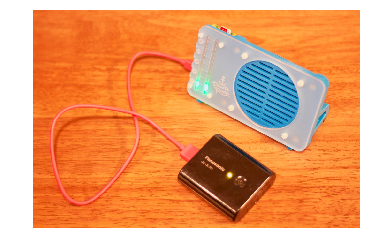

In [0]:
from PIL import Image
import matplotlib.pyplot as plt
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
plt.show()